In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import shapely.geometry
import numpy as np

In [2]:
in_c2vsim = pd.read_csv("../data/discharge/inflow_c2vsim/inflow.csv")
out_c2vsim = pd.read_csv("../data/discharge/outflow_c2vsim/outflow.csv")

In [3]:
in_c2vsim['date'] = in_c2vsim.date.str.slice(stop=-6)
# df['Date'] = pd.to_datetime(df['Date'])
in_c2vsim['date'] = pd.to_datetime(in_c2vsim['date'], format='%m/%d/%Y')
# df['Birthday2'] = df['Birthday'].dt.strftime('%m-%d-%Y')
in_c2vsim['date'] = in_c2vsim['date'].dt.strftime('%m-%Y')
# df.set_index('month')
in_c2vsim = in_c2vsim.set_index('date')

In [4]:
out_c2vsim['date'] = out_c2vsim.date.str.slice(stop=-6)
out_c2vsim['date'] = pd.to_datetime(out_c2vsim['date'], format='%m/%d/%Y')
out_c2vsim['date'] = out_c2vsim['date'].dt.strftime('%m-%Y')
out_c2vsim = out_c2vsim.set_index('date')

In [5]:
in_c2vsim = in_c2vsim.rename(columns={"inflow_km3" : "C2Vsim_inflow_km3"}, errors="raise")
out_c2vsim = out_c2vsim.rename(columns={"outflow_km3" : "C2Vsim_outflow_km3"}, errors="raise")

In [6]:
indf_w_sac = pd.read_csv("../data/inflow_w_sac.csv")
outdf_w_sac = pd.read_csv("../data/outflow_w_sac.csv")

In [7]:
indf_w_sac = indf_w_sac.rename(columns={"Unnamed: 0": "date", "inflow_km3" : "USGS_inflow_incSac_km3"}, errors="raise")

In [8]:
indf_w_sac['date'] = pd.to_datetime(indf_w_sac['date'], format='%Y-%m-%d')
indf_w_sac['date'] = indf_w_sac['date'].dt.strftime('%m-%Y')
indf_w_sac = indf_w_sac.set_index('date')

In [9]:
outdf_w_sac = outdf_w_sac.rename(columns={"Unnamed: 0": "date", "outflow_km3" : "USGS_outflow_incSac_km3"}, errors="raise")

In [10]:
outdf_w_sac['date'] = pd.to_datetime(outdf_w_sac['date'], format='%Y-%m-%d')
outdf_w_sac['date'] = outdf_w_sac['date'].dt.strftime('%m-%Y')
outdf_w_sac = outdf_w_sac.set_index('date')

In [11]:
indf_no_sac = pd.read_csv("../data/inflow_no_sac.csv")
outdf_no_sac = pd.read_csv("../data/outflow_no_sac.csv")

In [12]:
indf_no_sac = indf_no_sac.rename(columns={"Unnamed: 0": "date", "inflow_km3" : "USGS_inflow_noSac_km3"}, errors="raise")

In [13]:
indf_no_sac['date'] = pd.to_datetime(indf_no_sac['date'], format='%Y-%m-%d')
indf_no_sac['date'] = indf_no_sac['date'].dt.strftime('%m-%Y')
indf_no_sac = indf_no_sac.set_index('date')

In [14]:
outdf_no_sac = outdf_no_sac.rename(columns={"Unnamed: 0": "date", "outflow_km3" : "USGS_outflow_noSac_km3"}, errors="raise")

In [15]:
outdf_no_sac['date'] = pd.to_datetime(outdf_no_sac['date'], format='%Y-%m-%d')
outdf_no_sac['date'] = outdf_no_sac['date'].dt.strftime('%m-%Y')
outdf_no_sac = outdf_no_sac.set_index('date')

In [16]:
pls = pd.concat([indf_w_sac,outdf_w_sac,indf_no_sac,outdf_no_sac, in_c2vsim, out_c2vsim], axis = 1)

In [17]:
pls

USGS_inflow_incSac_km3  USGS_outflow_incSac_km3  \
date                                                       
01-2000                1.024165                 1.080603   
02-2000                3.308471                 2.920031   
03-2000                2.545969                 2.552785   
04-2000                0.935778                 1.129718   
05-2000                1.027335                 0.924849   
...                         ...                      ...   
08-1999                     NaN                      NaN   
09-1999                     NaN                      NaN   
10-1999                     NaN                      NaN   
11-1999                     NaN                      NaN   
12-1999                     NaN                      NaN   

         USGS_inflow_noSac_km3  USGS_outflow_noSac_km3  C2Vsim_inflow_km3  \
date                                                                        
01-2000               0.105865                0.122862           0.046445   
02-2000               0.241764                0.433030           0.136155   
03-2000               0.178034                0.429681           0.082077   
04-2000               0.123150                0.215138           0.049030   
05-2000               0.095640                0.127103           0.031274   
...                        ...                     ...                ...   
08-1999                    NaN                     NaN           0.016078   
09-1999                    NaN                     NaN           0.014840   
10-1999                    NaN                     NaN           0.015197   
11-1999                    NaN                     NaN           0.019982   
12-1999                    NaN                     NaN           0.016871   

         C2Vsim_outflow_km3  
date                         
01-2000            1.417749  
02-2000            4.303500  
03-2000            2.688289  
04-2000            1.098485  
05-2000            0.928594  
...                     ...  
08-1999            0.699995  
09-1999            0.604906  
10-1999            0.537069  
11-1999            0.669109  
12-1999            0.711387  

[582 rows x 6 columns]

In [18]:
pls = pls[pls['USGS_inflow_incSac_km3'].notna()]
pls = pls[pls['USGS_outflow_incSac_km3'].notna()]
pls = pls[pls['USGS_inflow_noSac_km3'].notna()]
pls = pls[pls['USGS_outflow_noSac_km3'].notna()]
pls = pls[pls['C2Vsim_inflow_km3'].notna()]
pls = pls[pls['C2Vsim_outflow_km3'].notna()]

In [19]:
pls

USGS_inflow_incSac_km3  USGS_outflow_incSac_km3  \
date                                                       
01-2000                1.024165                 1.080603   
02-2000                3.308471                 2.920031   
03-2000                2.545969                 2.552785   
04-2000                0.935778                 1.129718   
05-2000                1.027335                 0.924849   
...                         ...                      ...   
04-2019                2.624225                 2.767105   
05-2019                1.226603                 1.331238   
06-2019                1.218668                 1.192228   
07-2019                1.075788                 0.744091   
08-2019                1.155384                 0.746472   

         USGS_inflow_noSac_km3  USGS_outflow_noSac_km3  C2Vsim_inflow_km3  \
date                                                                        
01-2000               0.105865                0.122862           0.046445   
02-2000               0.241764                0.433030           0.136155   
03-2000               0.178034                0.429681           0.082077   
04-2000               0.123150                0.215138           0.049030   
05-2000               0.095640                0.127103           0.031274   
...                        ...                     ...                ...   
04-2019               0.556933                0.524190           0.174623   
05-2019               0.378254                0.473215           0.127913   
06-2019               0.254229                0.387785           0.037248   
07-2019               0.190231                0.133503           0.000000   
08-2019               0.301826                0.126955           0.000162   

         C2Vsim_outflow_km3  
date                         
01-2000            1.417749  
02-2000            4.303500  
03-2000            2.688289  
04-2000            1.098485  
05-2000            0.928594  
...                     ...  
04-2019            2.221971  
05-2019            1.110848  
06-2019            0.829957  
07-2019            0.718549  
08-2019            0.702924  

[236 rows x 6 columns]

Text(0.5, 1.0, 'Comparing Surface Water Inflow/Outflow in Butte County')

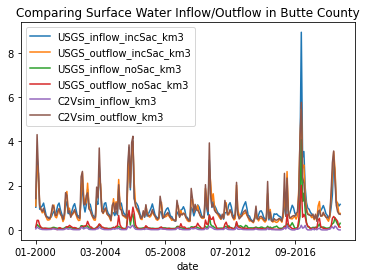

In [20]:
fig = pls.plot()
fig.set_title("Comparing Surface Water Inflow/Outflow in Butte County")

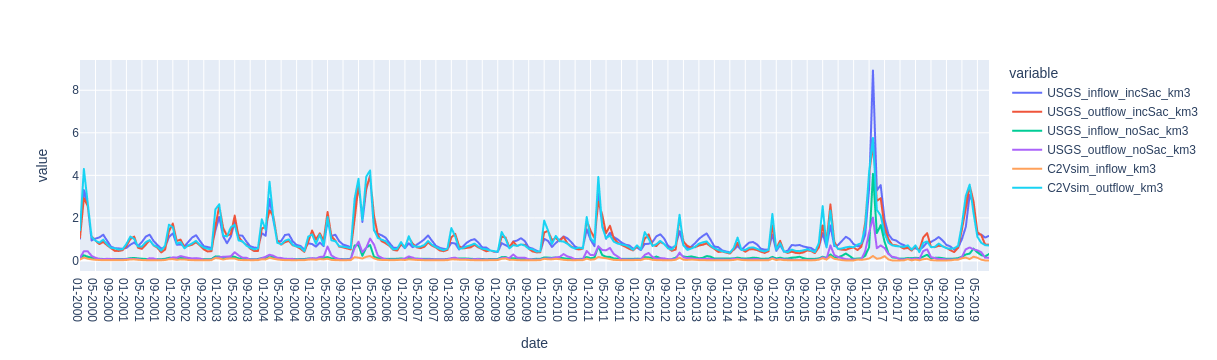

In [21]:
fig = px.line(pls, x=pls.index, y=['USGS_inflow_incSac_km3','USGS_outflow_incSac_km3', 'USGS_inflow_noSac_km3','USGS_outflow_noSac_km3','C2Vsim_inflow_km3', 'C2Vsim_outflow_km3'])
fig.show()

The Mapping Part

In [22]:
geodf = gpd.read_file('../gauges/usgs_gauges.shp')

In [23]:
modeldf = gpd.read_file('../shape/butte_gw_model.shp')

In [24]:
in_model = ['11377100', '11383500', '11390000', '11406900', '11407000', '11389500', '11421000']
# 1 is in, -1 is out
val = [1,1,1,1,1,-1,-1]

In [25]:
geodf = geodf.loc[geodf['gauge_id'].isin(in_model)]

In [26]:
geodf

gauge_id  q_km3_avg     q_km3_var            startdate  \
70   11389500   0.831649  3.426067e-01  1997-01-31 00:00:00   
165  11421000   0.169768  5.623046e-02  1997-01-31 00:00:00   
212  11377100   0.891560  4.033221e-01  1997-01-31 00:00:00   
215  11383500   0.024068  7.309599e-04  1997-01-31 00:00:00   
224  11390000   0.029641  1.037179e-03  1997-01-31 00:00:00   
227  11406900   0.000395  1.605590e-07  1997-01-31 00:00:00   
238  11407000   0.110604  7.791094e-02  1997-01-31 00:00:00   

                 enddate                     geometry  
70   2021-01-31 00:00:00  POINT (-122.00025 39.21406)  
165  2021-01-31 00:00:00  POINT (-121.52496 39.17573)  
212  2021-01-31 00:00:00  POINT (-122.18666 40.28849)  
215  2021-01-31 00:00:00  POINT (-121.94832 40.01405)  
224  2021-01-31 00:00:00  POINT (-121.70886 39.72600)  
227  2021-01-31 00:00:00  POINT (-121.68775 39.48933)  
238  2021-01-31 00:00:00  POINT (-121.54775 39.52155)

In [27]:
geodf['io'] = val

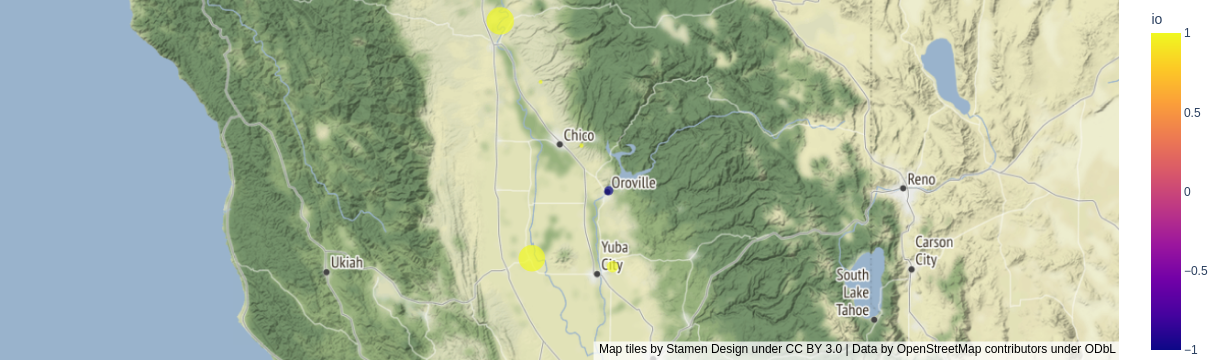

In [28]:
# df = px.data.carshare()
fig = px.scatter_mapbox(geodf, lat=geodf.geometry.y,
                        lon=geodf.geometry.x, size="q_km3_avg", color="io",mapbox_style="stamen-terrain",center={"lat": 39.57, "lon": -121.8375},
                  color_continuous_scale=px.colors.sequential.Plasma, zoom=6.9,hover_name="gauge_id")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [29]:
butteco = gpd.read_file('../shape/butte_gw_model.shp') # Butte_co_rpj.shp')

In [30]:
bclat = []
bclon = []
for feature in butteco.geometry:
    templon, templat = feature.exterior.coords.xy
    bclat = np.append(bclat,templat)
    bclon = np.append(bclon,templon)

In [38]:
# DEPRECATED
"""subregion = gpd.read_file('../data/stream_c2vsim/c2vsimfg-v1_0_gis/C2VSimFG-V1_0_GIS/Shapefiles/C2VSimFG_Subregions.shp')
subregion = subregion.to_crs(4326)
butte = subregion.iloc[[4]]"""

"subregion = gpd.read_file('../data/stream_c2vsim/c2vsimfg-v1_0_gis/C2VSimFG-V1_0_GIS/Shapefiles/C2VSimFG_Subregions.shp')\nsubregion = subregion.to_crs(4326)\nbutte = subregion.iloc[[4]]"

In [39]:
butte = gpd.read_file('../shape/c2vsim_subregion5.shp')

In [40]:
rivers = gpd.read_file('../data/stream_c2vsim/c2vsimfg-v1_0_gis/C2VSimFG-V1_0_GIS/Shapefiles/C2VSimFG_StreamReaches.shp')

In [41]:
rivers = rivers.to_crs(4326)

In [42]:
latsb = []
lonsb = []
namesb = []
for feature, name in zip(butte.geometry, butte.SubRegion):
    if isinstance(feature, shapely.geometry.Polygon):
        linestrings = [feature]
    for linestring in linestrings:
        print(linestring.exterior.coords)
        x, y = linestring.exterior.coords.xy
        latsb = np.append(latsb, y)
        lonsb = np.append(lonsb, x)
        namesb = np.append(namesb, [name]*len(y))
        latsb = np.append(latsb, None)
        lonsb = np.append(lonsb, None)
        namesb = np.append(namesb, None)

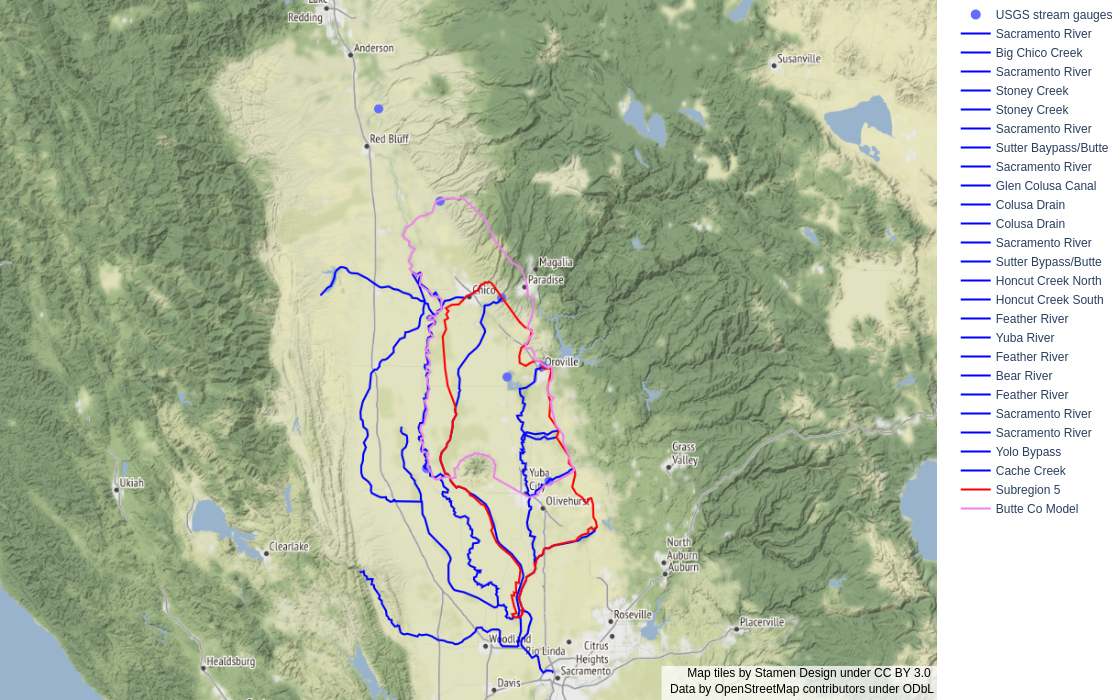

In [43]:
fig = go.Figure()
fig.add_trace(go.Scattermapbox(
    mode = "markers",
    hovertext='text',
    text=geodf['gauge_id'],
    name="USGS stream gauges",
    lon = geodf.geometry.x,
    lat = geodf.geometry.y,
    marker = {'size': 10}))

lats = []
lons = []
names = []

for feature, rivname in zip(rivers.geometry, rivers.Name):
    if isinstance(feature, shapely.geometry.linestring.LineString):
        rlon = []
        rlat = []
        templon, templat = feature.xy
        rlat = np.append(rlat,templat)
        rlon = np.append(rlon,templon)
        include_lat = any(i > 38.75 for i in rlat) and any(j < 39.75 for j in rlat)
        include_lon = any(i > -121.9 for i in rlat) and any(j < -121for j in rlat)
        if include_lat or include_lon:
            fig.add_trace(go.Scattermapbox(
                mode="lines",

                lat=rlat,
                lon=rlon,
                name=rivname,
                line = dict(width = 2, 
        color = 'blue'), opacity=1))

fig.add_trace(go.Scattermapbox(
    mode="lines",
    lon=lonsb, 
    lat=latsb,
    name = "Subregion 5",
    line = dict(width = 2, 
    color = 'red'), opacity=1))

fig.add_trace(go.Scattermapbox(
    mode="lines",
    lon=bclon, 
    lat=bclat,
    name = "Butte Co Model",
    line = dict(width = 2, 
    color = 'violet'), opacity=1))

fig.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'style': "stamen-terrain",
        'center': {"lat": 39.57, "lon": -121.8375},
        'zoom': 7.5}, width=700,
                  height=700,)

fig.show()